# Create media designs suggested by ART

We use ART to provide suggested designs for media components for which to get phenotypic data. 

For DBTL 4 we create 8 designs from an exploratory mode with $\alpha=1.$ and relative recommendations distance 300%, 7 designs from the exploitation mode ($\alpha=0$) and relative recommendations distance 200%, and 1 design being close to the standard media as a control, totalling 16 designs in triplicates. 

Tested using **ART 3.9.4** kernel on jprime.lbl.gov

## Inputs and output

**Required files to run this notebook:**
- `Putida_media_bounds.csv`
- `standard_recipe_concentrations.csv`
- EDD study slug(s)

**File generated by running this notebook**

- 

## Setup

Clone the git repository with the `ART` library 

`git clone https://github.com/JBEI/AutomatedRecommendationTool.git`  
<!-- <font color='red'> _____ -->
<!-- **WE SHOULD TALK ABOUT LICENSING HERE!!!** </font> -->

or pull the latest version. 

Information about licensing ART is available at https://github.com/JBEI/ART.

Importing needed libraries:

In [1]:
import sys
sys.path.append('../../AutomatedRecommendationTool')        # Make sure this is the location for the ART library 
sys.path.append('../')
import re
import warnings
    
from art.core import *
import art.plot as plot
import edd_utils as eddu

from core import designs_pairwise

## User parameters

In [2]:
CYCLE = 4

user_params = {
    'bounds_file': f'../data/flaviolin/Putida_media_bounds.csv',
    'output_file_path': f'../data/flaviolin/DBTL{CYCLE}', # Folder for output files,
    'standard_media_file': '../data/flaviolin/standard_recipe_concentrations.csv',
    'study_slug_1': 'combinatorial-media-for-flaviolin-dbtl1-ed1e',
    'study_slug_2': 'combinatorial-media-for-flaviolin-dbtl-2',
    'study_slug_3': 'combinatorial-media-for-flaviolin-dbtl-3',
    'edd_server': 'edd.jbei.org',
    'username': 'tradivojevic',
}


Specify which components to explore and which response to optimize:

In [3]:
user_params['components'] = [
    'H3BO3',
    'K2SO4',
    'K2HPO4',
    'FeSO4',
    'NH4Cl',
    'MgCl2',
    'NaCl',
    '(NH4)6Mo7O24',
    'CoCl2',
    'CuSO4',
    'MnSO4',
    'ZnSO4'
]

user_params['response'] = 'OD340'

Here we specify how many instances (designs) we want to create and how many replicates: 

In [4]:
user_params['n_instances_explor'] = 8
user_params['n_instances_exploit'] = 7
user_params['n_replicates'] = 3

## Load the data

In [5]:
study_slug_1 = user_params['study_slug_1']
study_slug_2 = user_params['study_slug_2']
study_slug_3 = user_params['study_slug_3']
edd_server = user_params['edd_server']
username = user_params['username']

In [6]:
try:
    session = eddu.login(edd_server=edd_server, user=username)
except:
    print('ERROR! Connection to EDD failed. We will try to load data from disk...')
else:
    print('OK! Connection to EDD successful. We will try to load data from EDD...')

Password for tradivojevic:  ··············


OK! Connection to EDD successful. We will try to load data from EDD...


In [7]:
try:
    df_1 = eddu.export_study(session, study_slug_1, edd_server=edd_server)
    df_2 = eddu.export_study(session, study_slug_2, edd_server=edd_server)
    df_3 = eddu.export_study(session, study_slug_3, edd_server=edd_server)
except (NameError, AttributeError, KeyError):
    print(f'ERROR! Not able to export the study.')



  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

In [8]:
df_1.head(2)

Study ID                               Study Name  Line ID     Line Name  \
0    148494  Combinatorial media for flaviolin DBTL1   148495  C1_WA1_A4-R1   
1    148494  Combinatorial media for flaviolin DBTL1   148496  C1_WA1_A4-R2   

                                    Line Description Protocol  Assay ID  \
0  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...    OD340    148543   
1  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...    OD340    148544   

     Assay Name  Formal Type Measurement Type  Compartment  Units   Value  \
0  C1_WA1_A4-R1          NaN  Optical Density            0    NaN  0.4422   
1  C1_WA1_A4-R2          NaN  Optical Density            0    NaN  0.3405   

   Hours  
0   48.0  
1   48.0

In [9]:
df_2.head(2)

Study ID                                Study Name  Line ID     Line Name  \
0    148639  Combinatorial media for flaviolin DBTL 2   148640  C2_WA1_A4-R1   
1    148639  Combinatorial media for flaviolin DBTL 2   148641  C2_WA1_A4-R2   

                                    Line Description Protocol  Assay ID  \
0  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...    OD340    148688   
1  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...    OD340    148689   

     Assay Name  Formal Type Measurement Type  Compartment  Units   Value  \
0  C2_WA1_A4-R1          NaN  Optical Density            0    NaN  0.3717   
1  C2_WA1_A4-R2          NaN  Optical Density            0    NaN  0.3748   

   Hours  
0   48.0  
1   48.0

In [10]:
df_3.head(2)

Study ID                                Study Name  Line ID     Line Name  \
0    148929  Combinatorial media for flaviolin DBTL 3   148930  C3_WA1_C1-R1   
1    148929  Combinatorial media for flaviolin DBTL 3   148931  C3_WA1_C1-R2   

                                    Line Description Protocol  Assay ID  \
0  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...    OD600    148978   
1  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...    OD600    148979   

     Assay Name  Formal Type Measurement Type  Compartment  Units  Value  \
0  C3_WA1_C1-R1          NaN  Optical Density            0    NaN  1.492   
1  C3_WA1_C1-R2          NaN  Optical Density            0    NaN  1.016   

   Hours  
0   48.0  
1   48.0

Concatenate the three studies:

In [11]:
df = df_1.append(df_2).append(df_3)

Drop unnecessary columns:

In [12]:
df = df.loc[:,['Line Name','Line Description','Protocol','Value']]
df.head()

Line Name                                   Line Description Protocol  \
0  C1_WA1_A4-R1  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...    OD340   
1  C1_WA1_A4-R2  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...    OD340   
2  C1_WA1_A4-R3  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...    OD340   
3  C1_WA1_A4-R4  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...    OD340   
4  C1_WA5_A8-R1  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...    OD340   

    Value  
0  0.4422  
1  0.3405  
2  0.3397  
3  0.3602  
4  0.2699

Pivot the dataframe to include columns for all protocols:

In [13]:
df = df.pivot(index=["Line Name", "Line Description"], columns="Protocol", values="Value")
df.reset_index(inplace=True)
df.head()

Protocol     Line Name                                   Line Description  \
0         C1_WA1_A4-R1  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...   
1         C1_WA1_A4-R2  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...   
2         C1_WA1_A4-R3  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...   
3         C1_WA1_A4-R4  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...   
4         C1_WA5_A8-R1  MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...   

Protocol   OD340  OD600  
0         0.4422  2.019  
1         0.3405  0.516  
2         0.3397  0.436  
3         0.3602  0.623  
4         0.2699  0.699

### Adding media information to the data frame

Add columns for each component:

In [14]:
components = re.split(': |, ', df['Line Description'][0])[::2]
for comp in components:
    df[comp] = None


And assign values for each component and line:

In [15]:
for i in range(len(df)):
    values = re.split(': |, ', df['Line Description'][i])[1::2]
    for c, value in enumerate(values):
        df.iloc[i, (4+c)] = float(value)

df.drop(columns='Line Description', inplace=True)
df.tail()

Protocol     Line Name   OD340  OD600  MOPS Tricine     H3BO3 Glucose  \
139       C3_WD7_F7-R2  0.5415  0.884  40.0     4.0  0.006221    20.0   
140       C3_WD7_F7-R3  0.5294  0.887  40.0     4.0  0.006221    20.0   
141       C3_WD8_F8-R1  0.2813  1.022  40.0     4.0  0.003709    20.0   
142       C3_WD8_F8-R2  0.2755  0.800  40.0     4.0  0.003709    20.0   
143       C3_WD8_F8-R3  0.2905  0.788  40.0     4.0  0.003709    20.0   

Protocol     K2SO4    K2HPO4     FeSO4     NH4Cl     MgCl2        NaCl  \
139       0.150431  6.409492   0.07174  7.294398   1.09227  384.376373   
140       0.150431  6.409492   0.07174  7.294398   1.09227  384.376373   
141       0.305525  1.243568  0.009372  9.943037  0.472293   53.326661   
142       0.305525  1.243568  0.009372  9.943037  0.472293   53.326661   
143       0.305525  1.243568  0.009372  9.943037  0.472293   53.326661   

Protocol (NH4)6Mo7O24     CoCl2     CuSO4     MnSO4     ZnSO4  
139           0.00029  0.002585  0.000905   0.00288  0.000835  
140           0.00029  0.002585  0.000905   0.00288  0.000835  
141          0.000029  0.000312  0.000094  0.000849  0.000098  
142          0.000029  0.000312  0.000094  0.000849  0.000098  
143          0.000029  0.000312  0.000094  0.000849  0.000098

Define the control lines. In DBTL 1 and 2, controls were wells F5 to F8. In DBTL 3 is stored in the last column (D8, E8, F8).

In [16]:
control_lines = df[df['Line Name'].str.find('WF5_F8') > 0]

control_lines = control_lines.append(df[df['Line Name'].str.find('WD8_F8') > 0])

In [17]:
control_lines

Protocol     Line Name   OD340  OD600  MOPS Tricine     H3BO3 Glucose  \
44        C1_WF5_F8-R1  0.2856  0.731  40.0     4.0  0.003797    20.0   
45        C1_WF5_F8-R2  0.2936  0.763  40.0     4.0  0.003797    20.0   
46        C1_WF5_F8-R3  0.2715  0.664  40.0     4.0  0.003797    20.0   
47        C1_WF5_F8-R4  0.2891  0.795  40.0     4.0  0.003797    20.0   
92        C2_WF5_F8-R1  0.2934  0.631  40.0     4.0  0.003929    20.0   
93        C2_WF5_F8-R2  0.2912  0.593  40.0     4.0  0.003929    20.0   
94        C2_WF5_F8-R3  0.3004  0.601  40.0     4.0  0.003929    20.0   
95        C2_WF5_F8-R4  0.2990  0.671  40.0     4.0  0.003929    20.0   
141       C3_WD8_F8-R1  0.2813  1.022  40.0     4.0  0.003709    20.0   
142       C3_WD8_F8-R2  0.2755  0.800  40.0     4.0  0.003709    20.0   
143       C3_WD8_F8-R3  0.2905  0.788  40.0     4.0  0.003709    20.0   

Protocol     K2SO4    K2HPO4     FeSO4     NH4Cl     MgCl2       NaCl  \
44         0.31178  1.325974  0.009506  9.927665  0.568441  50.767801   
45         0.31178  1.325974  0.009506  9.927665  0.568441  50.767801   
46         0.31178  1.325974  0.009506  9.927665  0.568441  50.767801   
47         0.31178  1.325974  0.009506  9.927665  0.568441  50.767801   
92        0.279019  1.232969  0.010158  9.510727  0.483299  47.544745   
93        0.279019  1.232969  0.010158  9.510727  0.483299  47.544745   
94        0.279019  1.232969  0.010158  9.510727  0.483299  47.544745   
95        0.279019  1.232969  0.010158  9.510727  0.483299  47.544745   
141       0.305525  1.243568  0.009372  9.943037  0.472293  53.326661   
142       0.305525  1.243568  0.009372  9.943037  0.472293  53.326661   
143       0.305525  1.243568  0.009372  9.943037  0.472293  53.326661   

Protocol (NH4)6Mo7O24     CoCl2     CuSO4     MnSO4     ZnSO4  
44            0.00003  0.000296  0.000096  0.000729  0.000102  
45            0.00003  0.000296  0.000096  0.000729  0.000102  
46            0.00003  0.000296  0.000096  0.000729  0.000102  
47            0.00003  0.000296  0.000096  0.000729  0.000102  
92           0.000027  0.000288  0.000104  0.000759  0.000095  
93           0.000027  0.000288  0.000104  0.000759  0.000095  
94           0.000027  0.000288  0.000104  0.000759  0.000095  
95           0.000027  0.000288  0.000104  0.000759  0.000095  
141          0.000029  0.000312  0.000094  0.000849  0.000098  
142          0.000029  0.000312  0.000094  0.000849  0.000098  
143          0.000029  0.000312  0.000094  0.000849  0.000098

How many designs improve response over the standard recipe?

In [18]:
control_response = np.max(control_lines['OD340'])
num_improved_response = np.sum(df['OD340'] > control_response)
num_designs = len(df) - len(control_lines)
print(f'{num_improved_response} samples out of {num_designs} improve over the standard in terms of OD340 ({num_improved_response/num_designs*100:.2f}%).')


94 samples out of 133 improve over the standard in terms of OD340 (70.68%).


### Convert the data to EDD format

Pivot the dataframe back to EDD format, including all the components names and protocols:

In [19]:
df_stacked = df.set_index('Line Name').stack().reset_index()
df_stacked.columns = ['Line Name', 'Measurement Type', 'Value']
df_stacked.head()

Line Name Measurement Type     Value
0  C1_WA1_A4-R1            OD340    0.4422
1  C1_WA1_A4-R1            OD600     2.019
2  C1_WA1_A4-R1             MOPS      40.0
3  C1_WA1_A4-R1          Tricine       4.0
4  C1_WA1_A4-R1            H3BO3  0.003744

# Media designs recommendations

## ART generated media

Define a dictionary that contains the settings that ART will use to find the recommended designs:

In [20]:
art_params = {
    'input_vars': user_params['components'],
    'response_vars': [user_params['response']],
    'bounds_file': user_params['bounds_file'], # file with bounds# input variables, i.e. features
    'seed': 10,                                           # seed for number random generator
    'cross_val': True,
    'recommend': False,
    'output_directory': user_params['output_file_path'],  # directory to store this output
    'verbose': 1
}


We will first run only model building part and then proceed with optimization using the two modes - exploration and exploitation>

In [21]:
user_params['alpha_explor'] = 1.0
user_params['alpha_exploit'] = None

With the configuration stored in art_params, we now run ART:

In [22]:
run_art = True

Best pipeline: ExtraTreesRegressor(AdaBoostRegressor(XGBRegressor(SGDRegressor(LinearSVR(input_matrix, C=0.001, dual=False, epsilon=0.001, loss=squared_epsilon_insensitive, tol=0.1), alpha=0.01, eta0=1.0, fit_intercept=True, l1_ratio=0.25, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet, power_t=1.0), learning_rate=0.01, max_depth=2, min_child_weight=12, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0), learning_rate=0.001, loss=exponential, n_estimators=100), bootstrap=False, max_features=0.55, min_samples_leaf=2, min_samples_split=12, n_estimators=100)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains, 0 divergences: 100%|██████████| 22000/22000 [00:27<00:00, 813.42draws/s]
The acceptance probability does not match the target. It is 0.8806413082346789, but should be close to 0.8. Try to increase the number of tuning steps.


Best pipeline: RidgeCV(RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.5, min_samples_leaf=19, min_samples_split=20, n_estimators=100))


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains, 1 divergences: 100%|██████████| 22000/22000 [00:25<00:00, 853.64draws/s] 
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6209737101595142, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


Best pipeline: XGBRegressor(CombineDFs(VarianceThreshold(input_matrix, threshold=0.05), input_matrix), learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9000000000000001, verbosity=0)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains, 9 divergences: 100%|██████████| 22000/22000 [00:22<00:00, 990.16draws/s] 
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


Best pipeline: XGBRegressor(RidgeCV(DecisionTreeRegressor(input_matrix, max_depth=10, min_samples_leaf=6, min_samples_split=12)), learning_rate=0.1, max_depth=1, min_child_weight=8, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.5, verbosity=0)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains, 30 divergences: 100%|██████████| 22000/22000 [00:32<00:00, 682.52draws/s]
There were 25 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6081623610436194, but should be close to 0.8. Try to increase the number of tuning steps.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Best pipeline: RidgeCV(RandomForestRegressor(CombineDFs(input_matrix, RBFSampler(input_matrix, gamma=0.25)), bootstrap=True, max_features=0.1, min_samples_leaf=15, min_samples_split=12, n_estimators=100))


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains, 15 divergences: 100%|██████████| 22000/22000 [00:23<00:00, 956.05draws/s] 
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.


Best pipeline: ExtraTreesRegressor(PolynomialFeatures(RandomForestRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), bootstrap=False, max_features=0.2, min_samples_leaf=17, min_samples_split=8, n_estimators=100), degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.55, min_samples_leaf=5, min_samples_split=8, n_estimators=100)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains, 2 divergences: 100%|██████████| 22000/22000 [00:22<00:00, 977.58draws/s] 
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


Best pipeline: LassoLarsCV(XGBRegressor(ElasticNetCV(SGDRegressor(input_matrix, alpha=0.001, eta0=1.0, fit_intercept=False, l1_ratio=0.5, learning_rate=constant, loss=huber, penalty=elasticnet, power_t=0.1), l1_ratio=0.65, tol=0.001), learning_rate=0.1, max_depth=5, min_child_weight=19, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9000000000000001, verbosity=0), normalize=True)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains, 1 divergences: 100%|██████████| 22000/22000 [00:24<00:00, 889.42draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


Best pipeline: RidgeCV(RandomForestRegressor(ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.4, min_samples_leaf=17, min_samples_split=8, n_estimators=100), bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=9, min_samples_split=20, n_estimators=100))


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains, 108 divergences: 100%|██████████| 22000/22000 [00:32<00:00, 685.70draws/s]
There were 107 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5988716229208, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Best pipeline: RandomForestRegressor(LinearSVR(input_matrix, C=0.01, dual=True, epsilon=0.001, loss=epsilon_insensitive, tol=0.0001), bootstrap=False, max_features=0.4, min_samples_leaf=1, min_samples_split=15, n_estimators=100)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains, 3 divergences: 100%|██████████| 22000/22000 [00:24<00:00, 905.75draws/s] 
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


Best pipeline: XGBRegressor(VarianceThreshold(input_matrix, threshold=0.001), learning_rate=0.1, max_depth=5, min_child_weight=8, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.55, verbosity=0)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains, 30 divergences: 100%|██████████| 22000/22000 [00:24<00:00, 908.89draws/s] 
There were 19 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6827058633098313, but should be close to 0.8. Try to increase the number of tuning steps.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


MAE    MRAE(%)     StdAE       MSE     $R^2$
Name                                                                          
Neural Regressor             0.136741  42.853627  0.118454  0.032729 -0.336298
Random Forest Regressor      0.051795  15.651368  0.056149  0.005835  0.761748
TPOT Regressor               0.052860  15.655140  0.046705  0.004976  0.796856
Support Vector Regressor     0.080798  25.453128  0.049343  0.008963  0.634054
Kernel Ridge Regressor       0.098469  26.393023  0.071591  0.014821  0.394860
K-NN Regressor               0.075677  24.921298  0.074023  0.011206  0.542457
Gaussian Process Regressor   0.052253  15.586225  0.040687  0.004386  0.820934
Gradient Boosting Regressor  0.049448  14.837325  0.053671  0.005326  0.782559
Ensemble Model               0.049000  14.998803  0.041175  0.004096  0.832747

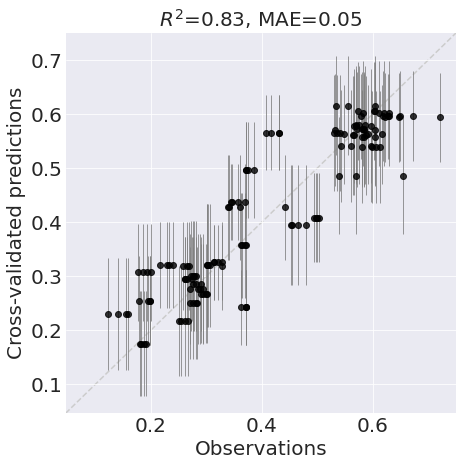

Best pipeline: XGBRegressor(VarianceThreshold(input_matrix, threshold=0.001), learning_rate=0.1, max_depth=7, min_child_weight=20, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains, 43 divergences: 100%|██████████| 22000/22000 [00:22<00:00, 961.64draws/s] 
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.


MAE    MRAE(%)     StdAE       MSE     $R^2$
Name                                                                          
Neural Regressor             0.068133  19.652915  0.047798  0.006927  0.717188
Random Forest Regressor      0.011662   2.916609  0.013101  0.000308  0.987440
TPOT Regressor               0.012358   3.131449  0.013240  0.000328  0.986607
Support Vector Regressor     0.061078  18.559063  0.029147  0.004580  0.813004
Kernel Ridge Regressor       0.019889   5.306377  0.016456  0.000666  0.972792
K-NN Regressor               0.023279   7.160569  0.020876  0.000978  0.960082
Gaussian Process Regressor   0.011988   3.025002  0.012872  0.000309  0.987367
Gradient Boosting Regressor  0.011587   2.886880  0.012874  0.000300  0.987752
Ensemble Model               0.012273   3.099473  0.013301  0.000328  0.986626

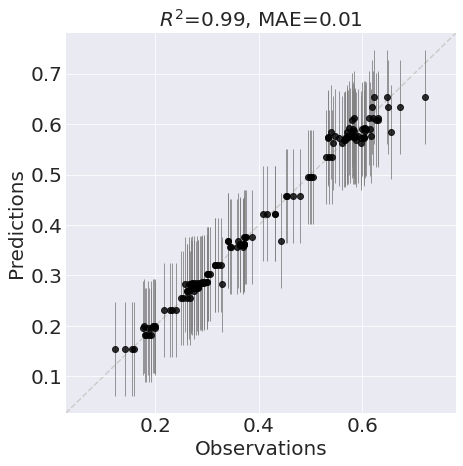

CPU times: user 55min 5s, sys: 1h 8min 21s, total: 2h 3min 26s
Wall time: 29min 33s


In [23]:
%%time
warnings.filterwarnings("ignore")
if run_art:
    art = RecommendationEngine(df_stacked, **art_params)
else:
    with open(os.path.join(art_params['output_directory'], 'art.pkl'), 'rb') as output:
        art = pickle.load(output)

In [25]:
art.evaluate_models_cv()

MAE    MRAE(%)     StdAE       MSE     $R^2$
Name                                                                          
Neural Regressor             0.136741  42.853627  0.118454  0.032729 -0.336298
Random Forest Regressor      0.051795  15.651368  0.056149  0.005835  0.761748
TPOT Regressor               0.052860  15.655140  0.046705  0.004976  0.796856
Support Vector Regressor     0.080798  25.453128  0.049343  0.008963  0.634054
Kernel Ridge Regressor       0.098469  26.393023  0.071591  0.014821  0.394860
K-NN Regressor               0.075677  24.921298  0.074023  0.011206  0.542457
Gaussian Process Regressor   0.052253  15.586225  0.040687  0.004386  0.820934
Gradient Boosting Regressor  0.049448  14.837325  0.053671  0.005326  0.782559
Ensemble Model               0.049000  14.998803  0.041175  0.004096  0.832747

### Exploitation recommendations

In [26]:
%%time
art.niter = 100000
art.alpha = user_params['alpha_exploit']
draws = art.parallel_tempering_opt()


Finished 2.00 percent in 9.155422 s Acceptance rate = 0.601Adding DE jump with weight 20
Finished 99.00 percent in 345.666697 s Acceptance rate = 0.447081
Run Complete
CPU times: user 5min 36s, sys: 1.97 s, total: 5min 38s
Wall time: 5min 49s


In [27]:
orig_file_name = f"{art_params['output_directory']}/draws.txt"
new_file_name = f"{art_params['output_directory']}/draws_exploit.txt"
os.rename(orig_file_name, new_file_name)

In [28]:
art.num_recommendations = user_params['n_instances_exploit'] # 7 in this DBTL4
art.rel_rec_distance = 2. # Default is 0.2
# At least one of the features in the recommendation must differ by this relative factor from any point in the training data and any previous recommendations
# Then pick the one with the best objective function value and add to the recommendations. Repeat the distance filtering above. 
# Stops when 7 recommendations are found.

# If it cannot find enough recommendations, it will decrease the distance by 0.80x and try again.
art.recommend(draws)


H3BO3     K2SO4    K2HPO4     FeSO4      NH4Cl     MgCl2        NaCl  \
0  0.024773  0.700826  4.062760  0.047732  12.929126  2.133702  414.274311   
1  0.000956  2.184192  3.440721  0.091458  10.338878  2.814993  415.796644   
2  0.008170  2.278140  5.092978  0.077865  11.739814  1.428153  411.076753   
3  0.018280  2.206493  3.451213  0.059624  12.453609  0.332198  401.210566   
4  0.014316  2.154430  2.710952  0.080738  10.910402  4.790117  456.776681   
5  0.009734  2.242214  4.680379  0.056417   9.194358  1.921812  392.324374   
6  0.033092  2.159783  3.831534  0.066500   9.140576  3.331034  469.248028   

   (NH4)6Mo7O24     CoCl2     CuSO4     MnSO4     ZnSO4     OD340  
0      0.000250  0.001827  0.000484  0.004128  0.000014  0.578698  
1      0.000265  0.000290  0.000688  0.002765  0.000014  0.513430  
2      0.000279  0.000292  0.000689  0.003862  0.000014  0.511907  
3      0.000221  0.002911  0.000710  0.004350  0.000014  0.500242  
4      0.000184  0.000292  0.000689  0.001921  0.000014  0.497449  
5      0.000141  0.001184  0.000696  0.004599  0.000014  0.494262  
6      0.000276  0.001106  0.000486  0.000465  0.000014  0.490792

In [29]:
df_rec_exploit = art.recommendations.copy()

Add standard deviation for the predictions:

In [30]:
predicted_mean, predicted_std = art.post_pred_stats(
            df_rec_exploit.values[:, :-1]
        ) # posterior predictive statistics: mean and std

df_rec_exploit['OD340_std'] = predicted_std
df_rec_exploit['Label'] = 'exploitation' # will be used for plotting in the parity plot in notebook F

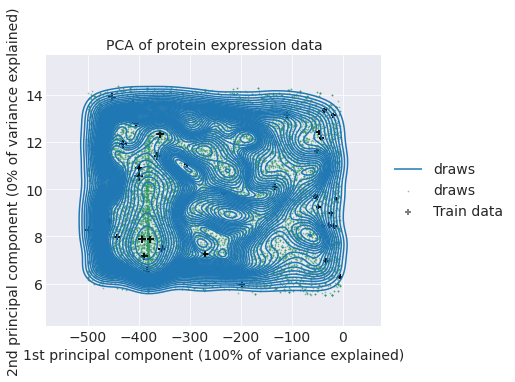

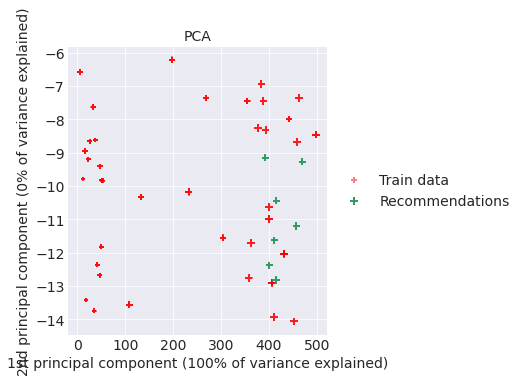

In [31]:
plot.draws_pc(art, draws, scale=100, plot_draws=True, plot_kde=True)
plot.recommendations_pc(art, scale=100)


In [32]:
plot.model_pairwise(art)

### Exploration recommendations

In [33]:
%%time
art.niter = 100000
art.alpha = user_params['alpha_explor']
draws = art.parallel_tempering_opt()


Finished 2.00 percent in 8.985280 s Acceptance rate = 0.589Adding DE jump with weight 20
Finished 99.00 percent in 317.986091 s Acceptance rate = 0.414026
Run Complete
CPU times: user 5min 9s, sys: 1.6 s, total: 5min 10s
Wall time: 5min 21s


In [34]:
orig_file_name = f"{art_params['output_directory']}/draws.txt"
new_file_name = f"{art_params['output_directory']}/draws_explor.txt"
os.rename(orig_file_name, new_file_name)

In [35]:
art.num_recommendations = user_params['n_instances_explor']
art.rel_rec_distance = 3.
art.recommend(draws)

H3BO3     K2SO4    K2HPO4     FeSO4      NH4Cl     MgCl2        NaCl  \
0  0.026205  2.868647  3.063754  0.051305   8.628131  5.058487  390.089741   
1  0.037669  0.800197  1.415873  0.084858  13.717068  1.459033  323.896805   
2  0.000523  2.849896  5.943808  0.079905   8.446208  4.240846  367.255495   
3  0.000705  2.224790  6.153711  0.097613  14.043278  4.794772  394.734535   
4  0.003253  2.266566  6.438007  0.054262   9.212677  2.150364  404.691896   
5  0.039067  2.582378  5.991768  0.078723   8.607087  4.521068  381.318487   
6  0.032352  2.681768  6.293779  0.003636  13.057300  1.678010  433.346634   
7  0.010556  2.601029  5.705683  0.082804  12.939917  3.939057  475.957694   

   (NH4)6Mo7O24     CoCl2     CuSO4     MnSO4     ZnSO4     OD340  
0      0.000030  0.000393  0.000282  0.003961  0.000835  0.404899  
1      0.000296  0.002085  0.000992  0.005032  0.000835  0.452337  
2      0.000123  0.002005  0.000048  0.003702  0.000835  0.408803  
3      0.000037  0.002773  0.000990  0.006802  0.000835  0.450592  
4      0.000010  0.002287  0.000066  0.001922  0.000835  0.429996  
5      0.000033  0.001623  0.000992  0.000209  0.000835  0.416583  
6      0.000258  0.002099  0.000391  0.007259  0.000835  0.430691  
7      0.000033  0.001986  0.000992  0.007573  0.000835  0.456518

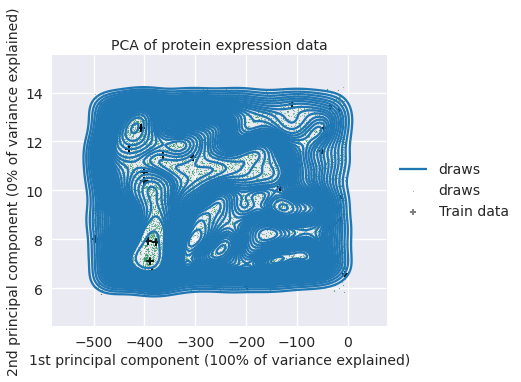

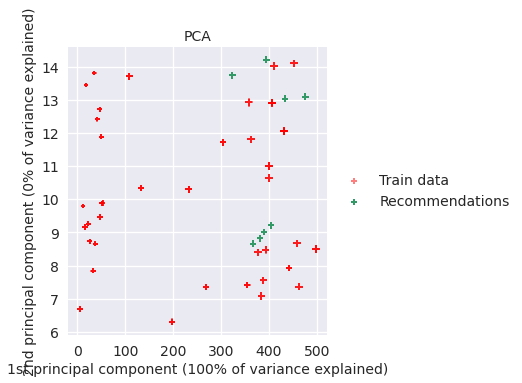

In [36]:
plot.draws_pc(art, draws, scale=100, plot_draws=True, plot_kde=True)
plot.recommendations_pc(art, scale=100)


In [37]:
df_rec_explor = art.recommendations.copy()


In [38]:
predicted_mean, predicted_std = art.post_pred_stats(
            df_rec_explor.values[:, :-1]
        )

df_rec_explor['OD340_std'] = predicted_std
df_rec_explor['Label'] = 'exploration'

In [39]:
df_rec = df_rec_exploit.append(df_rec_explor)

In [40]:
df_rec = df_rec.rename(columns={"OD340": "OD340_pred"})

### Generate the control media 

Read the standard recipe:

In [41]:
df_stand = pd.read_csv(user_params['standard_media_file']).set_index("Component")

Control media will be uniformly drawn from the interval 90% to 110% around the standard recipe.

In [42]:
ub = 1.1
lb = 0.9
df_control = pd.DataFrame(columns=user_params['components'])

for component in user_params['components']:
    stand_conc = df_stand.loc[component]['Concentration[mM]']
    df_control.at['Control', component] = stand_conc*np.random.uniform(lb, ub)

df_control

H3BO3     K2SO4    K2HPO4    FeSO4     NH4Cl     MgCl2       NaCl  \
Control  0.003932  0.309966  1.206566  0.01076  9.146237  0.502864  52.253707   

        (NH4)6Mo7O24     CoCl2   CuSO4     MnSO4     ZnSO4  
Control      0.00003  0.000304  0.0001  0.000726  0.000098

Check that these controls are not equivalent to the controls tested in previous cycles:

In [43]:
for component in user_params['components']:
     assert(all(df_control.at['Control', component] != control_lines[component]))

Add ART's prediction for this design

In [44]:
control_predicted_mean, control_predicted_std = art.post_pred_stats(
            df_control.values
        )
df_control['OD340_pred'] = control_predicted_mean
df_control['OD340_std'] = control_predicted_std
df_control['Label'] = 'standard'

In [45]:
df_rec = df_rec.append(df_control).reset_index(drop=True)
df_rec

H3BO3     K2SO4    K2HPO4     FeSO4      NH4Cl     MgCl2        NaCl  \
0   0.024773  0.700826   4.06276  0.047732  12.929126  2.133702  414.274311   
1   0.000956  2.184192  3.440721  0.091458  10.338878  2.814993  415.796644   
2    0.00817   2.27814  5.092978  0.077865  11.739814  1.428153  411.076753   
3    0.01828  2.206493  3.451213  0.059624  12.453609  0.332198  401.210566   
4   0.014316   2.15443  2.710952  0.080738  10.910402  4.790117  456.776681   
5   0.009734  2.242214  4.680379  0.056417   9.194358  1.921812  392.324374   
6   0.033092  2.159783  3.831534    0.0665   9.140576  3.331034  469.248028   
7   0.026205  2.868647  3.063754  0.051305   8.628131  5.058487  390.089741   
8   0.037669  0.800197  1.415873  0.084858  13.717068  1.459033  323.896805   
9   0.000523  2.849896  5.943808  0.079905   8.446208  4.240846  367.255495   
10  0.000705   2.22479  6.153711  0.097613  14.043278  4.794772  394.734535   
11  0.003253  2.266566  6.438007  0.054262   9.212677  2.150364  404.691896   
12  0.039067  2.582378  5.991768  0.078723   8.607087  4.521068  381.318487   
13  0.032352  2.681768  6.293779  0.003636    13.0573   1.67801  433.346634   
14  0.010556  2.601029  5.705683  0.082804  12.939917  3.939057  475.957694   
15  0.003932  0.309966  1.206566   0.01076   9.146237  0.502864   52.253707   

   (NH4)6Mo7O24     CoCl2     CuSO4     MnSO4     ZnSO4  OD340_pred  \
0       0.00025  0.001827  0.000484  0.004128  0.000014    0.578698   
1      0.000265   0.00029  0.000688  0.002765  0.000014    0.513430   
2      0.000279  0.000292  0.000689  0.003862  0.000014    0.511907   
3      0.000221  0.002911   0.00071   0.00435  0.000014    0.500242   
4      0.000184  0.000292  0.000689  0.001921  0.000014    0.497449   
5      0.000141  0.001184  0.000696  0.004599  0.000014    0.494262   
6      0.000276  0.001106  0.000486  0.000465  0.000014    0.490792   
7       0.00003  0.000393  0.000282  0.003961  0.000835    0.404899   
8      0.000296  0.002085  0.000992  0.005032  0.000835    0.452337   
9      0.000123  0.002005  0.000048  0.003702  0.000835    0.408803   
10     0.000037  0.002773   0.00099  0.006802  0.000835    0.450592   
11      0.00001  0.002287  0.000066  0.001922  0.000835    0.429996   
12     0.000033  0.001623  0.000992  0.000209  0.000835    0.416583   
13     0.000258  0.002099  0.000391  0.007259  0.000835    0.430691   
14     0.000033  0.001986  0.000992  0.007573  0.000835    0.456518   
15      0.00003  0.000304    0.0001  0.000726  0.000098    0.278462   

    OD340_std         Label  
0    0.048176  exploitation  
1    0.048443  exploitation  
2    0.048315  exploitation  
3    0.048573  exploitation  
4    0.048050  exploitation  
5    0.047818  exploitation  
6    0.048198  exploitation  
7    0.049958   exploration  
8    0.049624   exploration  
9    0.049504   exploration  
10   0.049459   exploration  
11   0.049452   exploration  
12   0.049271   exploration  
13   0.049217   exploration  
14   0.049108   exploration  
15   0.047606      standard

### Check the distribution of designs

Define dataframe with train data and predictions:

In [46]:
df_train = df[user_params['components']]
df_train['OD340'] = df['OD340']

Add predictions, cv-predictions and standard deviation of the OD340 predictions:

In [49]:
train_predicted_mean, train_predicted_std = art.post_pred_stats(
            df_train.values[:, :-1]
        )

In [50]:
df_train['OD340_pred'] = train_predicted_mean
df_train['OD340_std'] = train_predicted_std
df_train['OD340_cv_pred'] = art.model_df_cv[0]["Predictions"]["Ensemble Model"]
df_train['OD340_cv_std'] = art.model_df_cv[0]["Predictions StDev"]["Ensemble Model"]

Add label for control lines:

In [51]:
df_train['Label'] = 'train'
df_train.loc[control_lines.index, 'Label'] = 'standard'

In [52]:
df_train

Protocol     H3BO3     K2SO4    K2HPO4     FeSO4      NH4Cl     MgCl2  \
0         0.003744  0.029492  3.995413  0.042847   6.490478  0.214493   
1         0.003744  0.029492  3.995413  0.042847   6.490478  0.214493   
2         0.003744  0.029492  3.995413  0.042847   6.490478  0.214493   
3         0.003744  0.029492  3.995413  0.042847   6.490478  0.214493   
4         0.009185  0.380499  1.156774  0.007971  11.618192  5.030266   
..             ...       ...       ...       ...        ...       ...   
139       0.006221  0.150431  6.409492   0.07174   7.294398   1.09227   
140       0.006221  0.150431  6.409492   0.07174   7.294398   1.09227   
141       0.003709  0.305525  1.243568  0.009372   9.943037  0.472293   
142       0.003709  0.305525  1.243568  0.009372   9.943037  0.472293   
143       0.003709  0.305525  1.243568  0.009372   9.943037  0.472293   

Protocol        NaCl (NH4)6Mo7O24     CoCl2     CuSO4     MnSO4     ZnSO4  \
0         197.916509     0.000016  0.000254  0.000309  0.006371  0.000866   
1         197.916509     0.000016  0.000254  0.000309  0.006371  0.000866   
2         197.916509     0.000016  0.000254  0.000309  0.006371  0.000866   
3         197.916509     0.000016  0.000254  0.000309  0.006371  0.000866   
4           50.60791     0.000155  0.000152  0.000029   0.00041  0.000277   
..               ...          ...       ...       ...       ...       ...   
139       384.376373      0.00029  0.002585  0.000905   0.00288  0.000835   
140       384.376373      0.00029  0.002585  0.000905   0.00288  0.000835   
141        53.326661     0.000029  0.000312  0.000094  0.000849  0.000098   
142        53.326661     0.000029  0.000312  0.000094  0.000849  0.000098   
143        53.326661     0.000029  0.000312  0.000094  0.000849  0.000098   

Protocol   OD340  OD340_pred  OD340_std  OD340_cv_pred  OD340_cv_std     Label  
0         0.4422    0.369218   0.047605       0.427238      0.049997     train  
1         0.3405    0.369218   0.047605       0.427238      0.049997     train  
2         0.3397    0.369218   0.047605       0.427238      0.049997     train  
3         0.3602    0.369218   0.047605       0.427238      0.049997     train  
4         0.2699    0.276460   0.047611       0.250693      0.052678     train  
..           ...         ...        ...            ...           ...       ...  
139       0.5415    0.535413   0.047618       0.565205      0.054754     train  
140       0.5294    0.535413   0.047618       0.565205      0.054754     train  
141       0.2813    0.284243   0.047602       0.286457      0.044353  standard  
142       0.2755    0.284243   0.047602       0.286457      0.044353  standard  
143       0.2905    0.284243   0.047602       0.286457      0.044353  standard  

[144 rows x 18 columns]

Save train data set for this cycle:

In [53]:
file = f"{user_params['output_file_path']}/train_pred.csv"
df_train.to_csv(file)

In [55]:
def designs_pairwise(art, df_rec, user_params, df_train=None):

    dim = art.num_input_var

    plt.style.use('seaborn-whitegrid')

    fig = plt.figure(figsize=(35, 35))
    fig.patch.set_facecolor("white")

    X = df_rec[user_params['components']].values
    X_train = df_train[user_params['components']].values
    standard = df_train[df_train['Label']=='standard'].drop(columns='Label').values

    for var1 in range(dim):
        for var2 in range(var1 + 1, dim):

            ax = fig.add_subplot(dim, dim, (var2 * dim + var1 + 1))
            ax.scatter(
                X_train[:, var1],
                X_train[:, var2],
                c="r",
                marker="+",
                s=150*df_train['OD340'],
                lw=1,
                label="Train data",
            )
            
            ax.scatter(
                standard[:, var1],
                standard[:, var2],
                c="k",
                marker="+",
                s=150*standard[:, -1].astype(float),
                lw=1,
                label="Standard",
            )
            
            ax.scatter(
                X[:, var1],
                X[:, var2],
                c="g",
                marker="+",
                s=150*df_rec['OD340_pred'],
                lw=1,
                label="Recommendations",
            )
            
            ax.scatter(
                X[-1, var1],
                X[-1, var2],
                c="k",
                marker="+",
                s=150*df_rec['OD340_pred'].values[-1],
                lw=1,
                label="Standard",
            )
            
            
                        
            if var2 == (dim - 1):
                ax.set_xlabel(art.input_vars[var1])
            if var1 == 0:
                ax.set_ylabel(art.input_vars[var2])
                if var2 == 0:
                    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), shadow=True)

    fig.savefig(
        f'{art.outDir}/designs_pairwise.png',
        bbox_inches="tight",
        transparent=False, 
        dpi=300
    )

Red are train data, green are recommendations, black are standards

In [57]:
import matplotlib.pyplot as plt

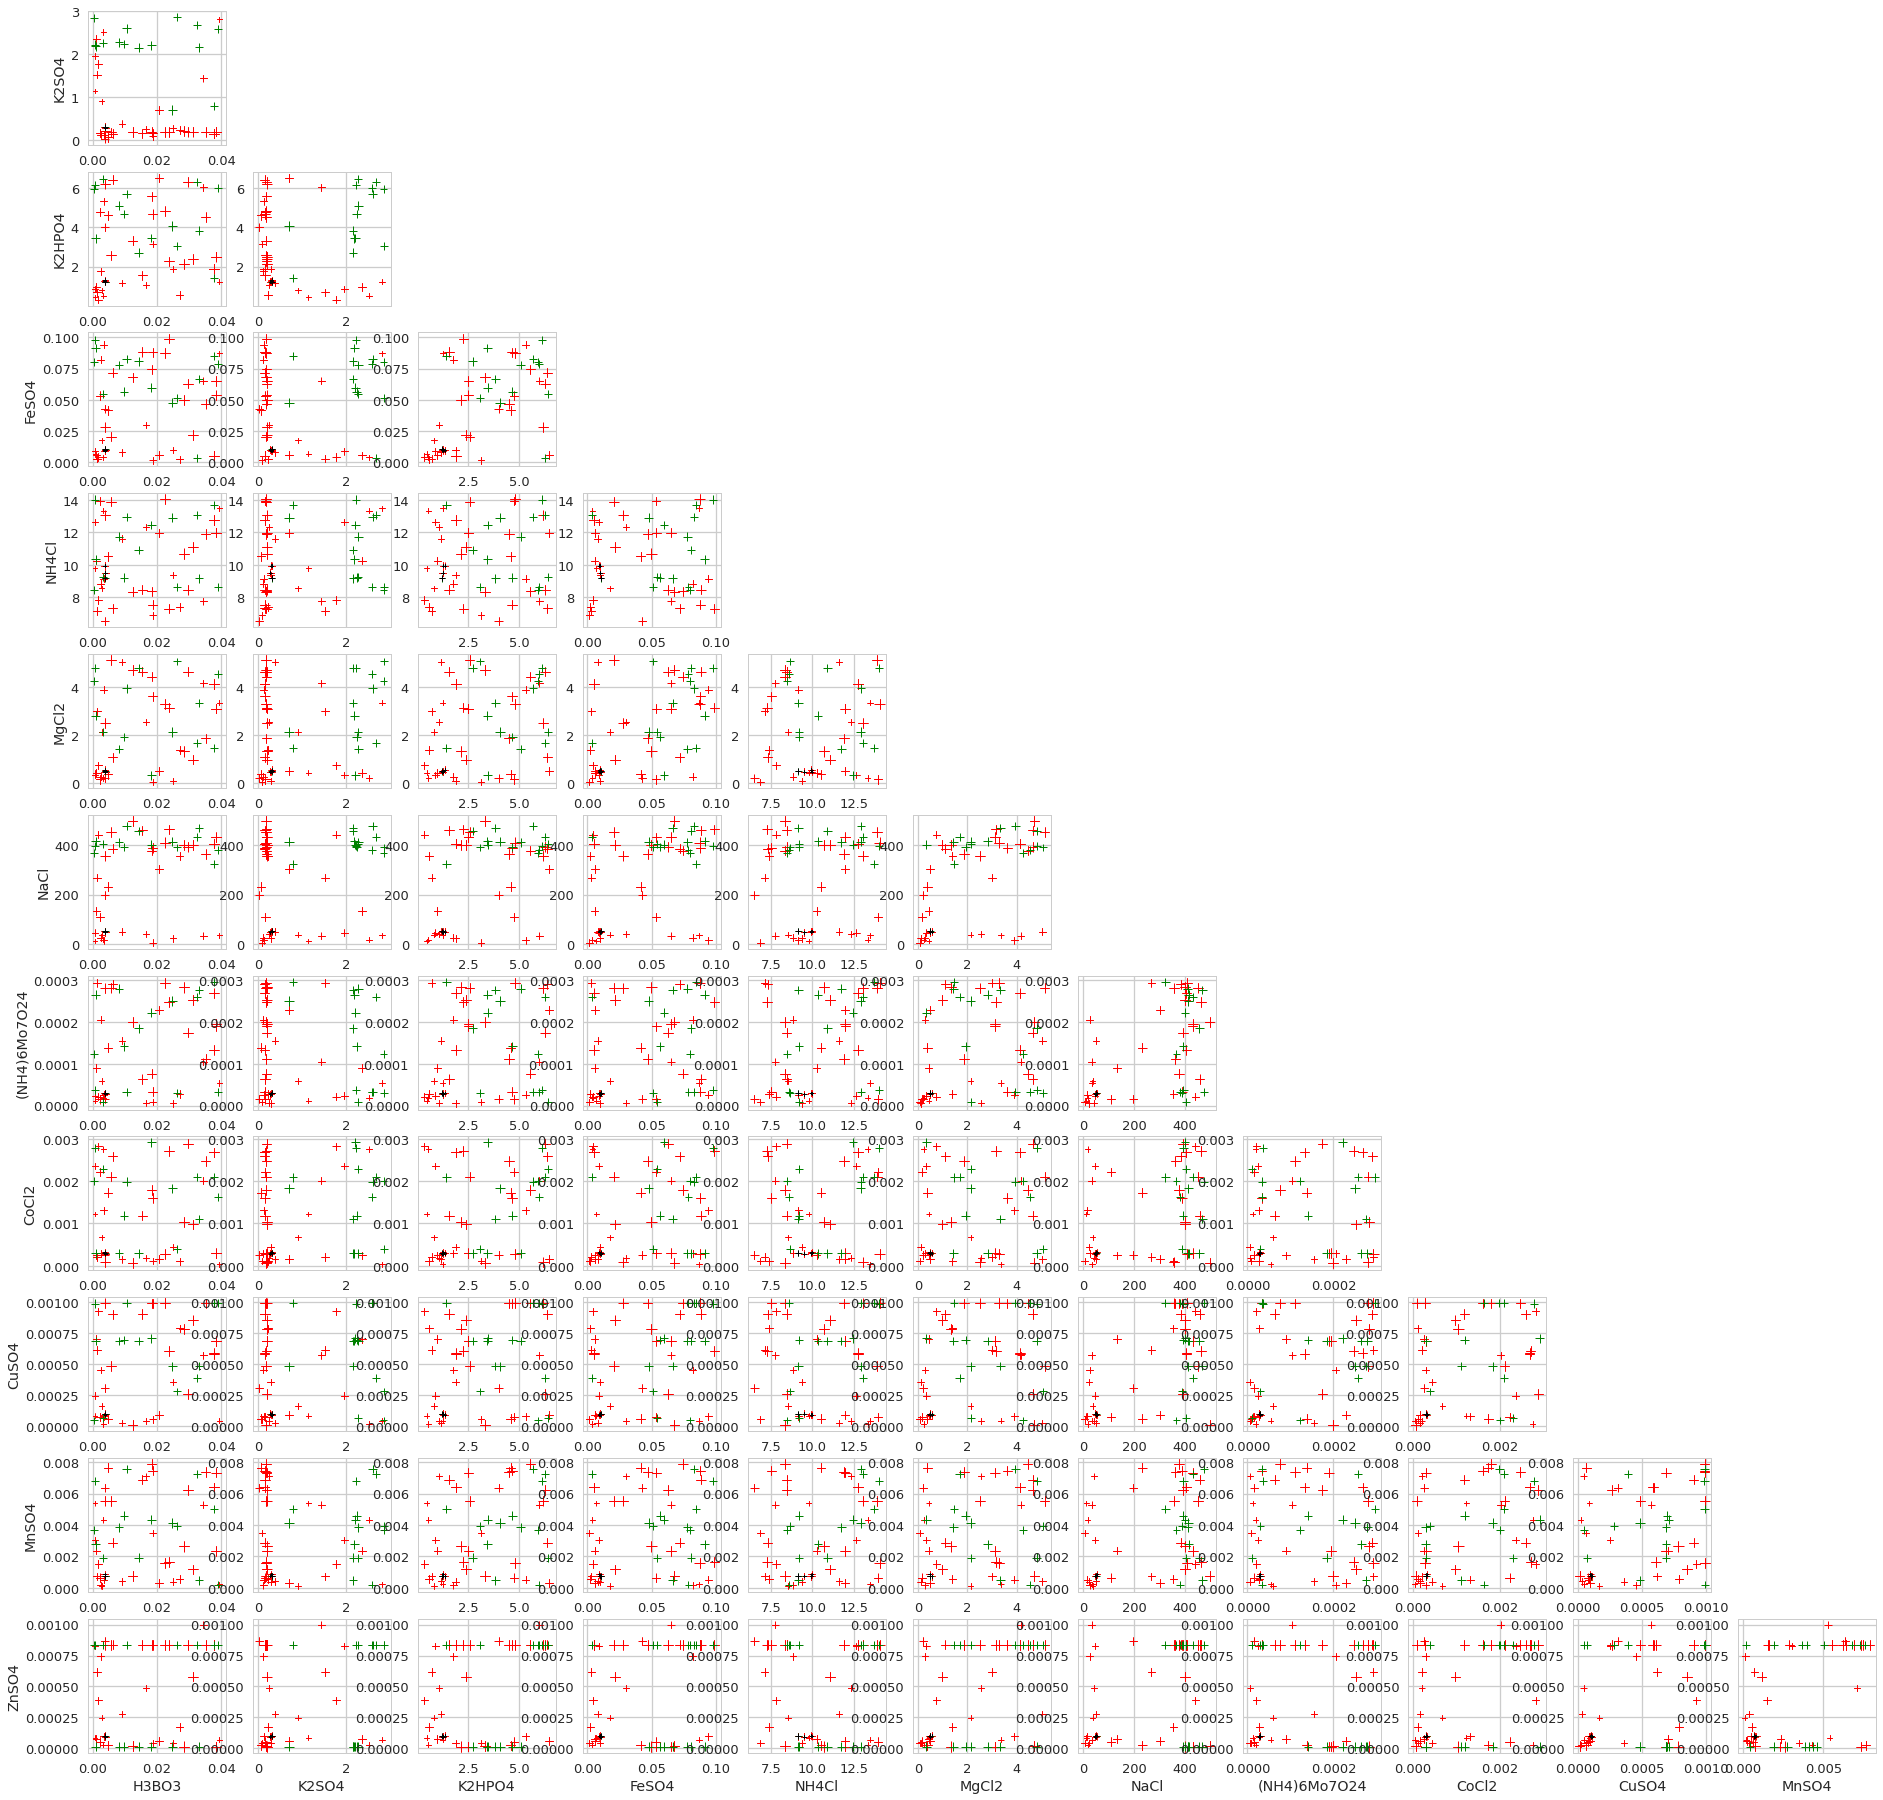

In [58]:
designs_pairwise(art, df_rec, user_params, df_train)

## Saving the generated designs

Include all replicates: 

In [59]:
df_rec = df_rec.loc[df_rec.index.repeat(user_params['n_replicates'])]


Rename index to well names:

In [60]:
well_rows = 'ABCDEF'
well_columns = '12345678'

In [61]:
well_names = [f'{row}{column}'  for column in well_columns for row in well_rows]

df_rec['Well'] = well_names
df_rec = df_rec.set_index(['Well'])
df_rec.head()

H3BO3     K2SO4    K2HPO4     FeSO4      NH4Cl     MgCl2        NaCl  \
Well                                                                            
A1    0.024773  0.700826   4.06276  0.047732  12.929126  2.133702  414.274311   
B1    0.024773  0.700826   4.06276  0.047732  12.929126  2.133702  414.274311   
C1    0.024773  0.700826   4.06276  0.047732  12.929126  2.133702  414.274311   
D1    0.000956  2.184192  3.440721  0.091458  10.338878  2.814993  415.796644   
E1    0.000956  2.184192  3.440721  0.091458  10.338878  2.814993  415.796644   

     (NH4)6Mo7O24     CoCl2     CuSO4     MnSO4     ZnSO4  OD340_pred  \
Well                                                                    
A1        0.00025  0.001827  0.000484  0.004128  0.000014    0.578698   
B1        0.00025  0.001827  0.000484  0.004128  0.000014    0.578698   
C1        0.00025  0.001827  0.000484  0.004128  0.000014    0.578698   
D1       0.000265   0.00029  0.000688  0.002765  0.000014    0.513430   
E1       0.000265   0.00029  0.000688  0.002765  0.000014    0.513430   

      OD340_std         Label  
Well                           
A1     0.048176  exploitation  
B1     0.048176  exploitation  
C1     0.048176  exploitation  
D1     0.048443  exploitation  
E1     0.048443  exploitation

In [62]:
file = f"{user_params['output_file_path']}/target_concentrations.csv"
df_rec.to_csv(file) # This file will be used for the computation of volume transfers and data analysis